In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import HuberRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif, f_regression
import numpy as np

In [2]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
df =  pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv')

In [4]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [5]:
df = df.select_dtypes(include='number').fillna(0)

In [6]:
nota = df.query('NU_NOTA_MT != 0')

In [7]:
df.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
1,2016,4314902,43,24,0.0,1,1,4314902.0,43.0,1,...,0.0,0.0,5,5,0,5,5,5,5,5.0
2,2016,2304707,23,17,0.0,3,1,2304707.0,23.0,2,...,0.0,0.0,5,5,1,1,1,1,1,0.0
3,2016,2304400,23,21,0.0,3,1,2304400.0,23.0,3,...,0.0,0.0,5,5,5,5,5,5,5,0.0
4,2016,3304557,33,25,0.0,0,1,3304557.0,33.0,1,...,5.0,5.0,5,5,5,5,2,5,5,5.0
5,2016,1302603,13,28,0.0,2,1,1505304.0,15.0,1,...,5.0,4.0,5,5,4,3,1,4,5,0.0


In [10]:
X = df.drop(['NU_NOTA_MT', 'TP_PRESENCA_MT'], axis=1)
y = df['NU_NOTA_MT']

In [11]:
f_regression = SelectKBest(score_func=f_regression, k=9)
fit = f_regression.fit(X,y)
features = fit.transform(X)

In [12]:
cols = fit.get_support(indices=True)
X = X.iloc[:, cols]

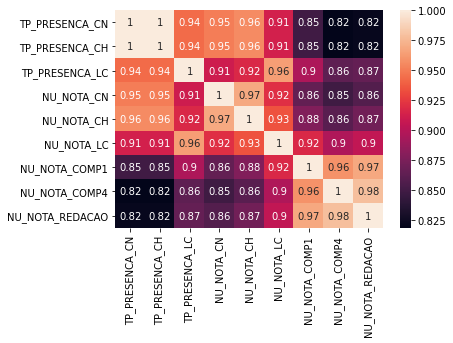

In [13]:
sns.heatmap(X.corr(), annot=True)

In [14]:
reg = HuberRegressor()

In [15]:
reg.fit(X, y)

C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [16]:
score = cross_val_score(reg, X, y, cv=10)

C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

In [17]:
np.mean(score)

0.9052471099510205

In [18]:
df2 = test.loc[:,list(X.columns)]
df2.fillna(0, inplace=True)

In [19]:
df2

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP4,NU_NOTA_REDACAO
0,1,1,1,464.8,443.5,431.8,120.0,100.0,420.0
1,1,1,1,391.1,491.1,548.0,120.0,120.0,580.0
2,1,1,1,595.9,622.7,613.6,80.0,80.0,320.0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,592.9,492.6,571.4,100.0,80.0,320.0
...,...,...,...,...,...,...,...,...,...
4571,1,1,1,398.3,558.2,511.6,120.0,100.0,500.0
4572,1,1,1,427.6,579.7,471.1,100.0,120.0,520.0
4573,1,1,1,639.2,643.8,604.9,160.0,140.0,640.0
4574,1,1,1,427.1,467.9,540.2,140.0,140.0,520.0


In [20]:
# Realizando a predição
pred = reg.predict(df2)
df2['NU_NOTA_MT'] = [x if x > 300 else 0 for x in pred]
# Inserindo os numeros de inscrição
df2['NU_INSCRICAO'] = test.loc[:,['NU_INSCRICAO']]

# Preparando df para exportação
df2 = df2.loc[:,['NU_INSCRICAO', 'NU_NOTA_MT']]

In [21]:
df2

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,430.849498
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,457.999880
2,b38a03232f43b11c9d0788abaf060f7366053b6d,575.110476
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,561.561624
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,432.532029
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,426.439132
4573,655fa6306720ff16e825903b5422a46608a77545,619.198053
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,489.131916


In [22]:
(df2['NU_NOTA_MT'] == 0).sum()

1205

In [23]:
df2.to_csv('answer.csv', index=False)

# Sua nota é: 93.076785